Collaborative coding using GitHub
===========

Alexandre Perera Luna, Mónica Rojas Martínez

December 15th 2023


# Goal

The objective of this assignment is to construct a project through collaborative coding, showcasing an Exploratory Data Analysis (EDA) and a classification. To facilitate your understanding of GitHub, we will utilize code snippets from previous exercises, allowing you to focus on the process without concerns about the final outcome. The current notebook will serve as the main function in the project, and each participant is required to develop additional components and integrate their contributions into the main branch.


## Requirements

In order to work with functions created in other jupyter notebooks you need to install the package `nbimporter` using a shell and the following command:

<font color='grey'>pip install nbimporter</font> 

`nbimporter` allows you to import jupyter notebooks as modules. Once intalled and imported, you can use a command like the following to import a function called *fibonacci* that is stored on a notebook *fibbo_func* in the same path as the present notebook:

<font color='green'>from</font> fibbo_func <font color='green'>import</font> fibbonaci  <font color='green'>as</font> fibbo



In [1]:
## Modify this cell by importing all the necessary modules you need to solve the assigmnent. Observe that we are importing
## the library nbimporter. You will need it for calling fuctions created in other notebooks. 
import nbimporter
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
# Here is an example of invoking the Fibonacci function, whisch should be located in the same directory as the main:
from fibbo_func import fibbonaci as fibbo
fibbo(24)

46368

## Exercises
As an illustration of Git workflow, you will analyze the *Parkinson's* dataset, which has been previously examined in past assignments. Each team member has specific responsibilities that may be crucial for the progress of others. Make sure all of you organize your tasks accordingly. We've structured the analysis into modules to assist you in tracking your tasks, but feel free to deviate from it if you prefer.   
Please use Markdown cells for describing your workflow and expalining the findings of your work. 
Remember you need both, to modify this notebook and, to create additional functions outside. Your work will only be available for others when you modify and merge your changes.


In [3]:
# We will start by loading the parkinson dataset. The rest is up to you!
df = pd.read_csv('parkinsons.data', 
                 dtype = { # indicate categorical variables
                     'status': 'category'})
df.head(5)

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


### 1. Cleaning and tidying the dataset

In [4]:
# To start cleaning and tidying the dataset, first, it is necessary to rename the variables
from collaborator1_notebook import renamevars

# Defining the dictionary to rename the variables
dict_names = {'MDVP:Fo(Hz)':'avFF',
              'MDVP:Fhi(Hz)':'maxFF', 
              'MDVP:Flo(Hz)':'minFF',
              'MDVP:Jitter(%)': 'percJitter',
              'MDVP:Jitter(Abs)':'absJitter' ,
              'MDVP:RAP': 'rap',
              'MDVP:PPQ': 'ppq',
              'Jitter:DDP': 'ddp',
              'MDVP:Shimmer' : 'lShimer',
              'MDVP:Shimmer(dB)': 'dbShimer',
              'Shimmer:APQ3':'apq3',
              'Shimmer:APQ5': 'apq5',
              'MDVP:APQ':'apq',
              'Shimmer:DDA':'dda'}

renamed_df=renamevars(df, dict_names)

#Now, the first 5 rows are shown again to be able to see the differences between the original dataframe and this new one.
renamed_df.head(5)

,name,avFF,maxFF,minFF,percJitter,absJitter,rap,ppq,ddp,lShimer,...,dda,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [5]:
# The second step is to look for missing values and, if there are any, substitute them for the mean of the corresponding column if we are dealing with
# a numeric column or remove the input if it is a non-numeric column.
from collaborator1_notebook import missing_values
full_df=missing_values(renamed_df)

No missing values found.


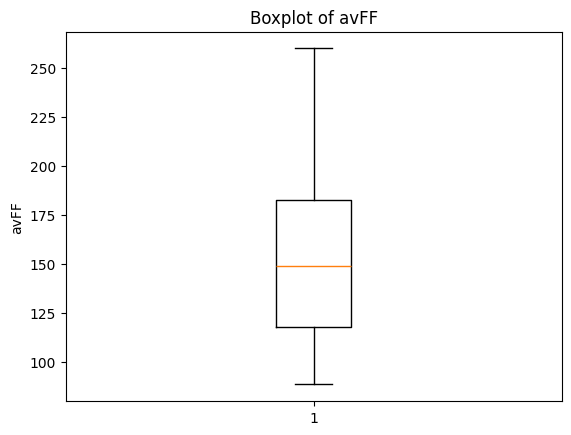

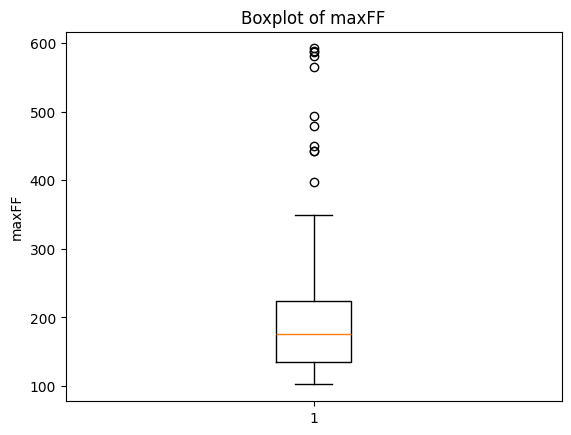

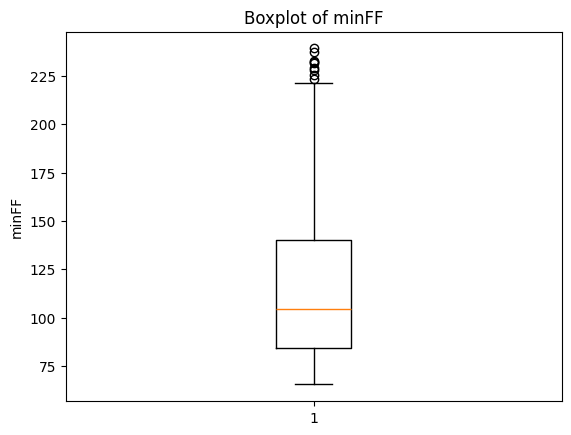

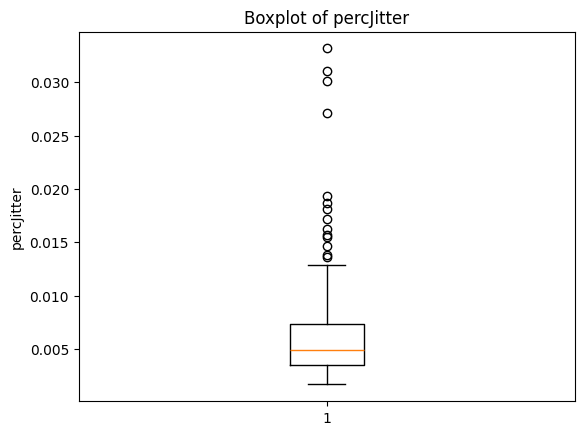

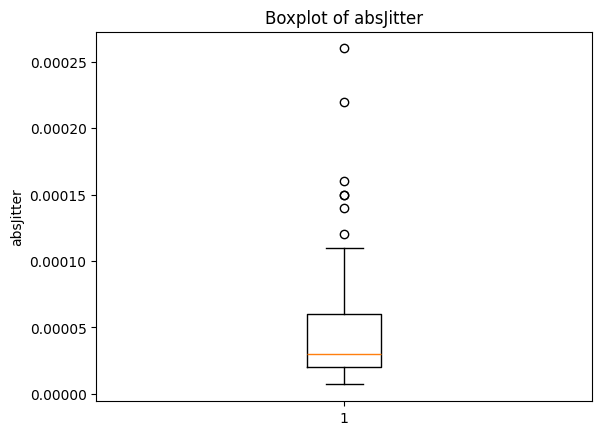

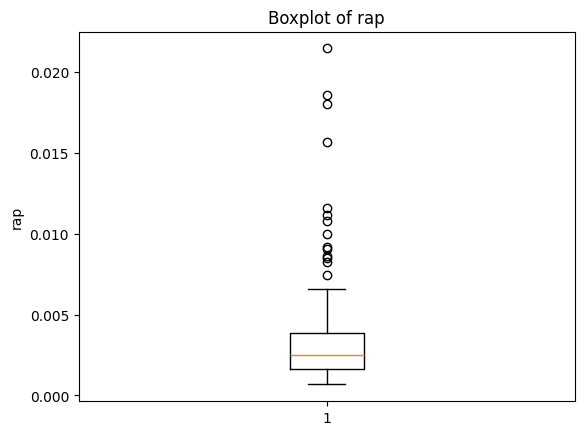

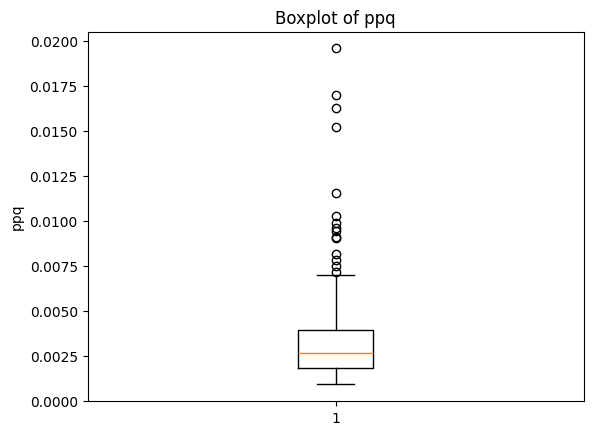

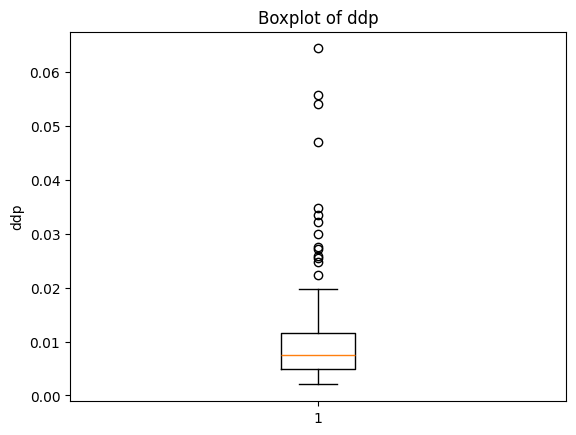

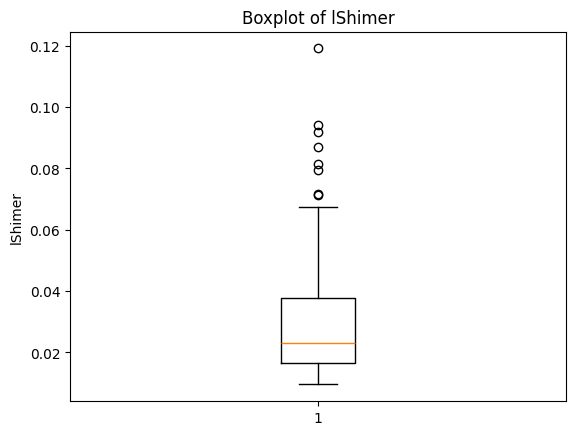

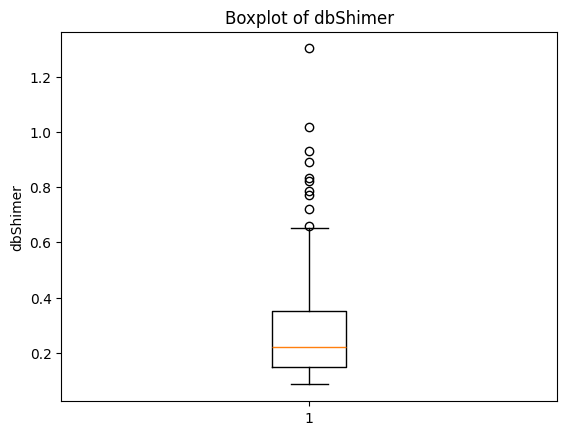

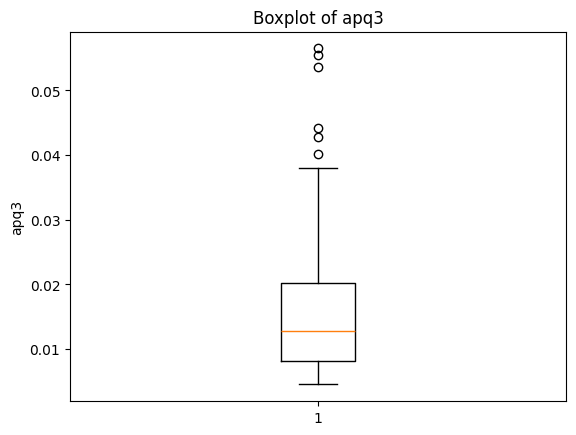

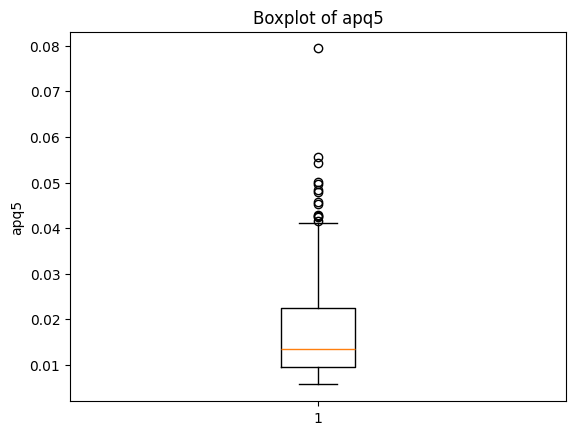

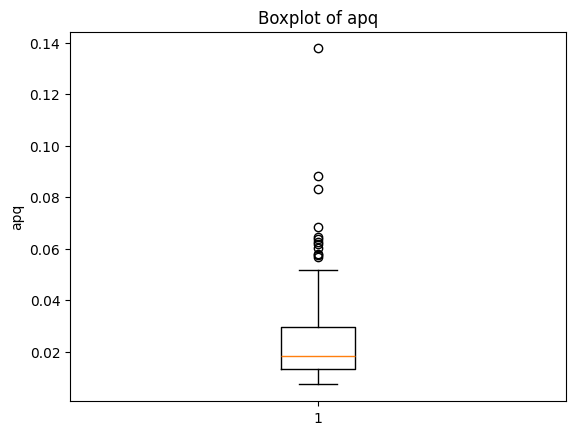

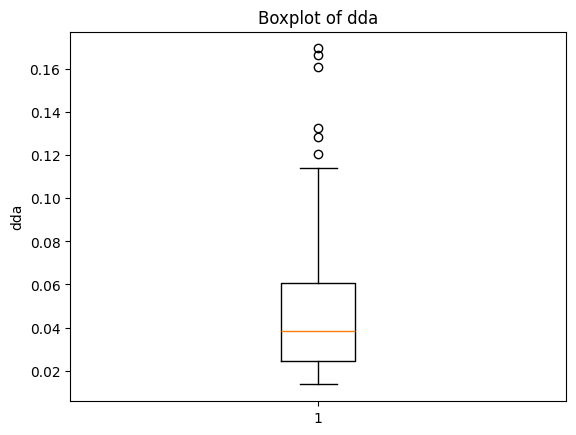

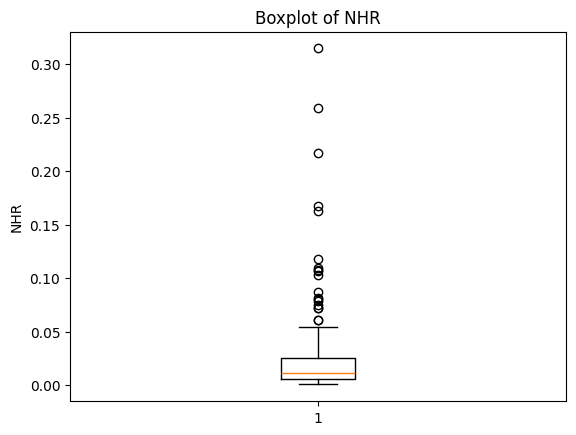

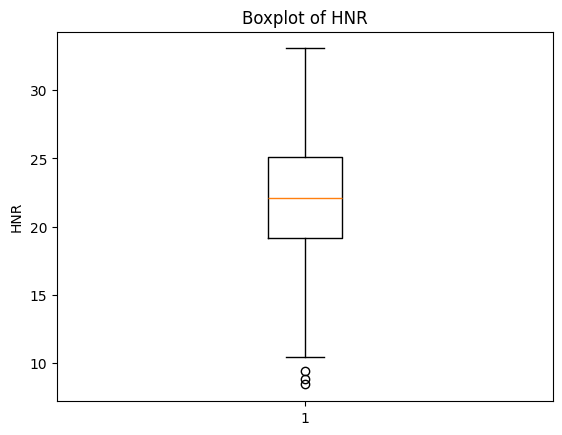

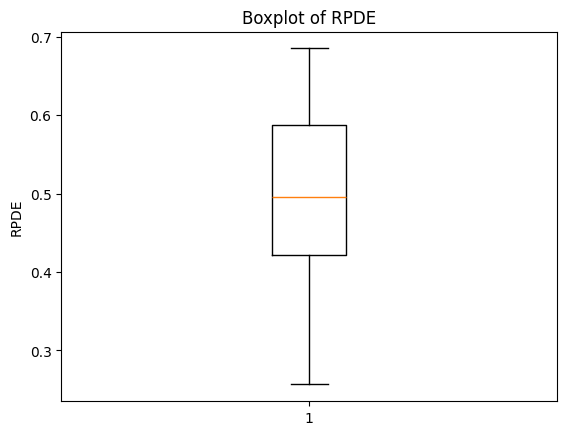

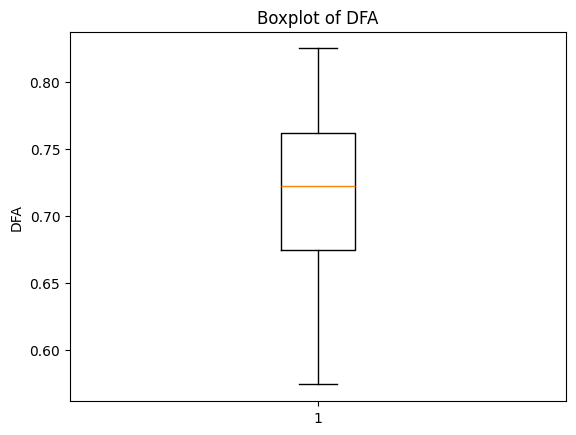

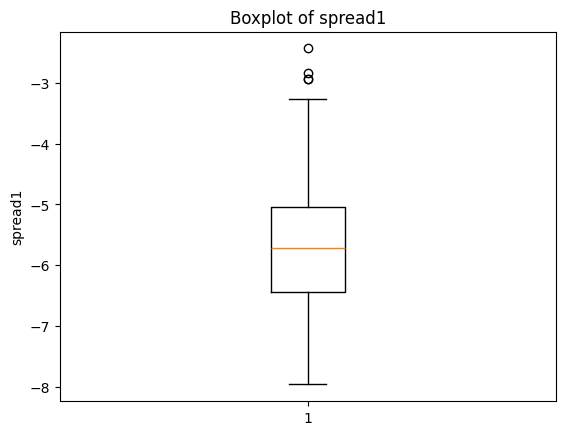

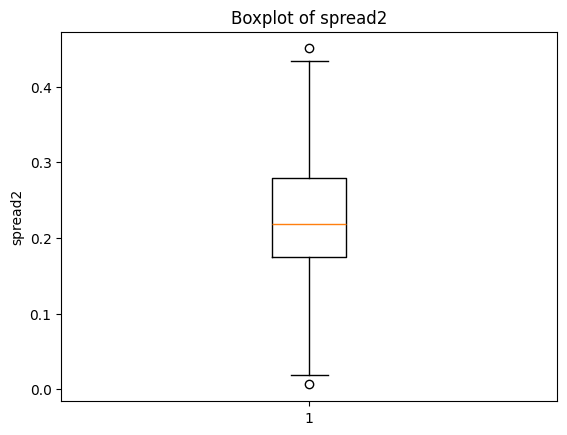

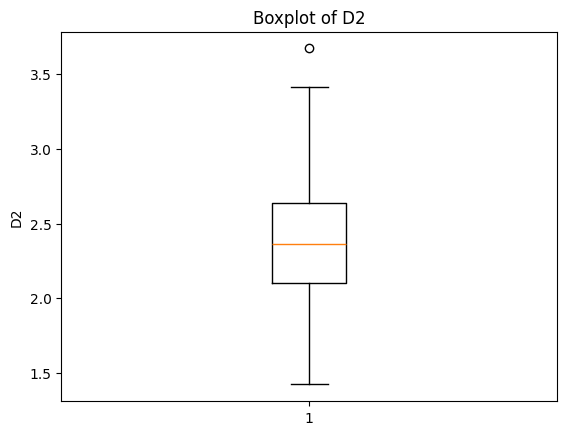

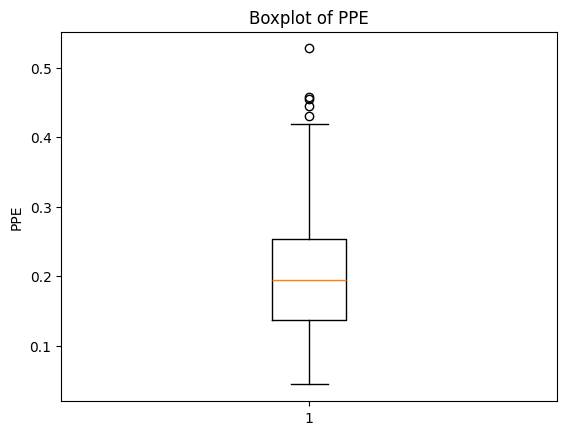

In [6]:
# Finally, the last step is to deal with outliers. In this case, the function defined in collaborator1 is going to be used, so the outliers detected
# are going to be substituted with the mean value of the corresponding column.

# First, the renamed dataframe is going to be plot using boxplots to see the current outliers. Then, the replace_outliers function will be used and
# the boxplots will be created again in order to make a comparison.
for col in renamed_df.columns:
    if renamed_df[col].dtype.kind in 'biufc':  # Checking if the data type is numeric
        fig, ax = plt.subplots()
        ax.boxplot(renamed_df[col].dropna())  # Drop NA values for plotting if there are
        plt.ylabel(col)
        plt.title(f"Boxplot of {col}")
        plt.show()


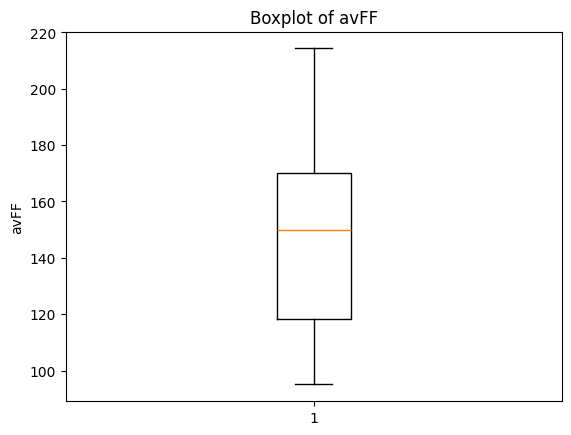

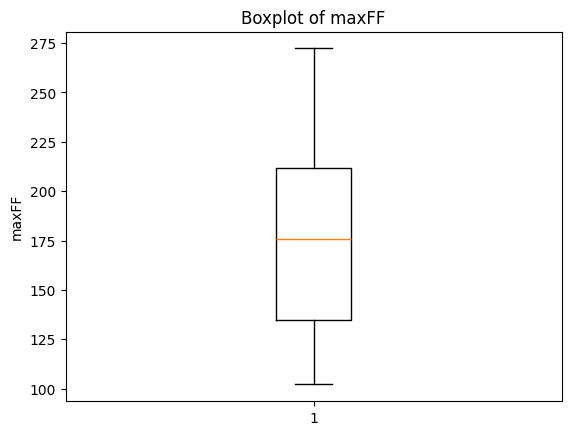

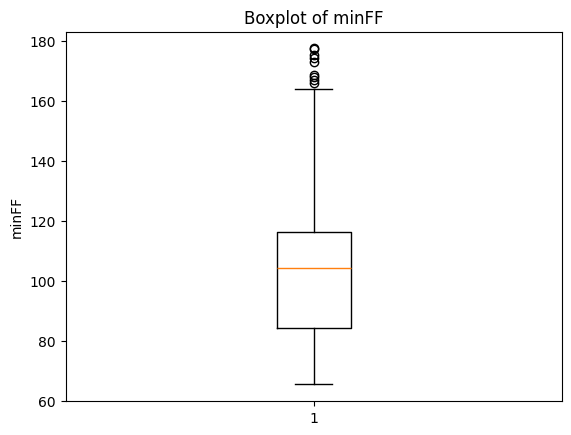

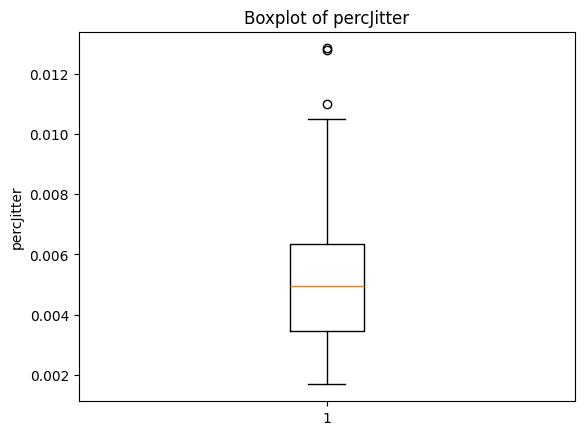

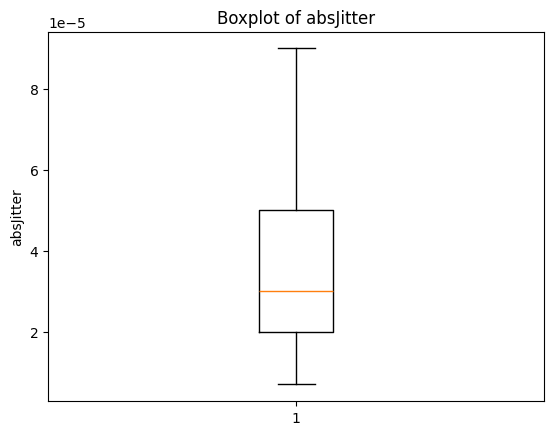

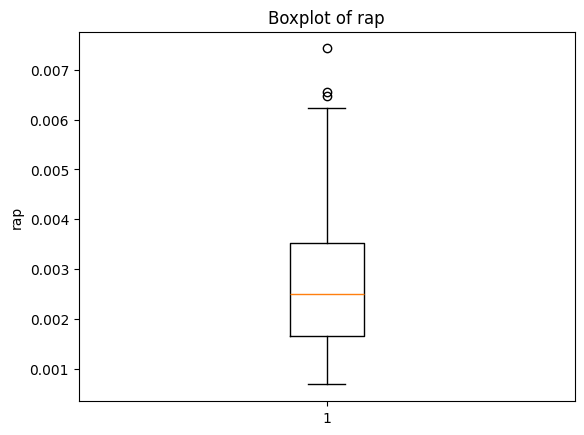

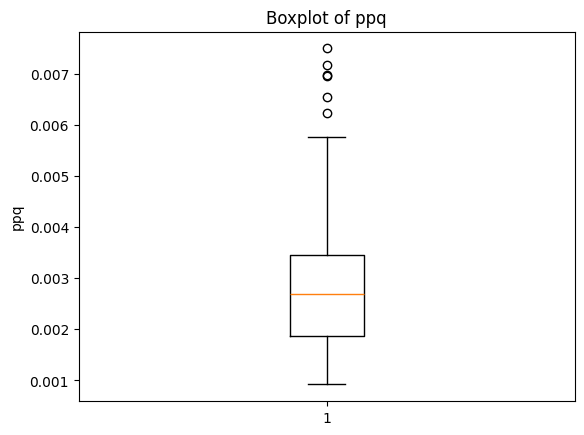

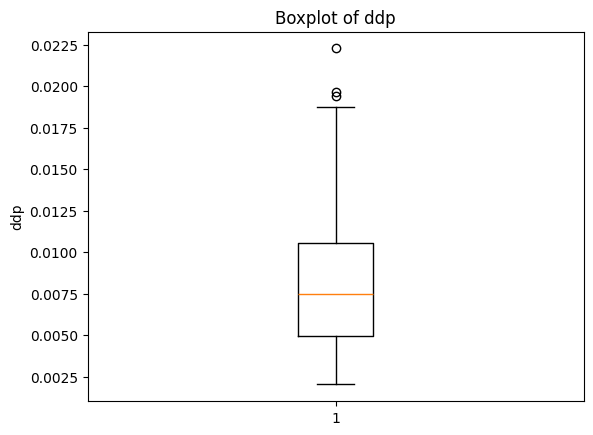

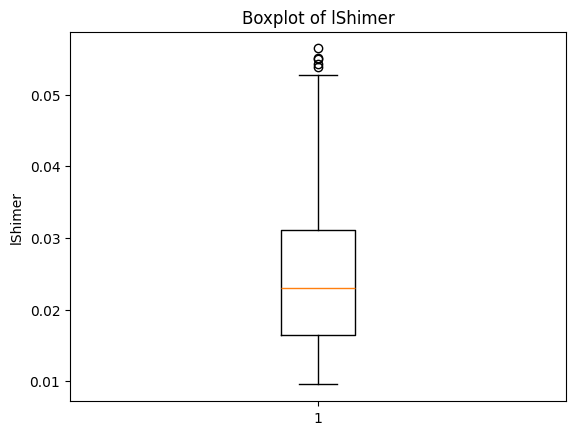

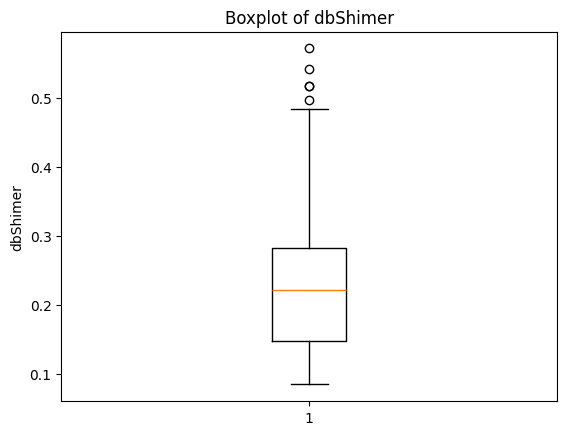

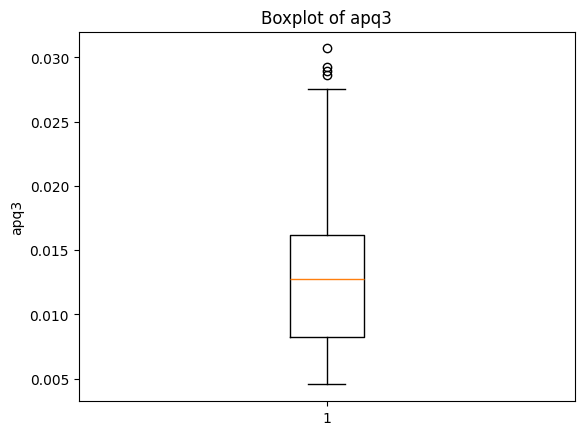

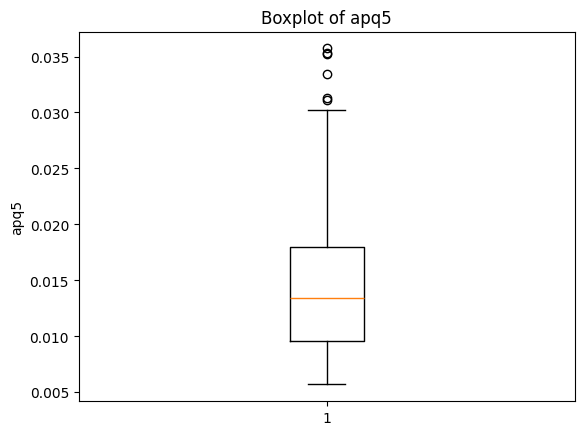

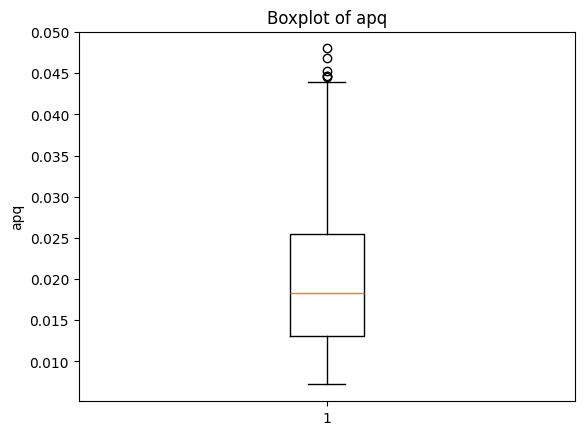

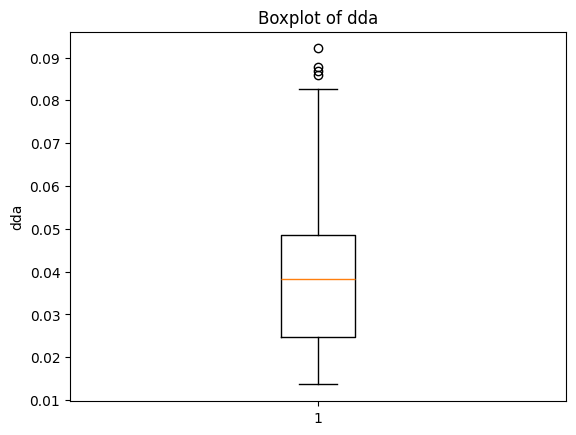

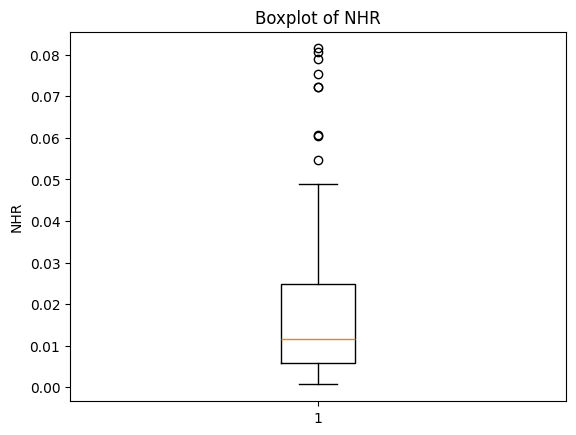

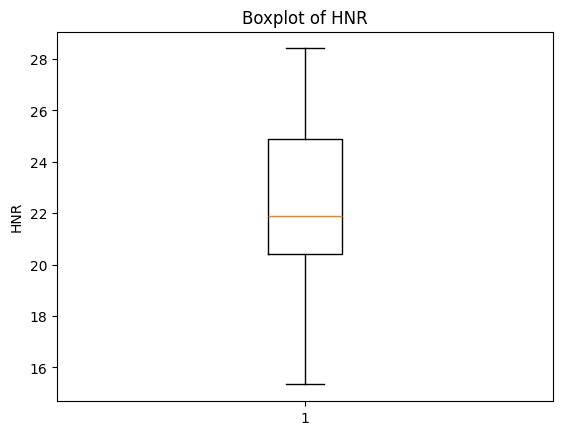

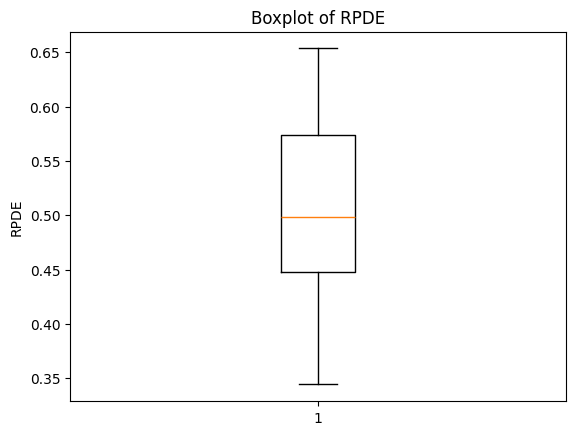

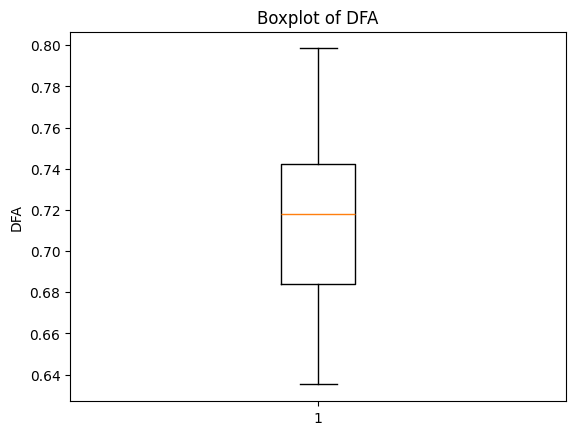

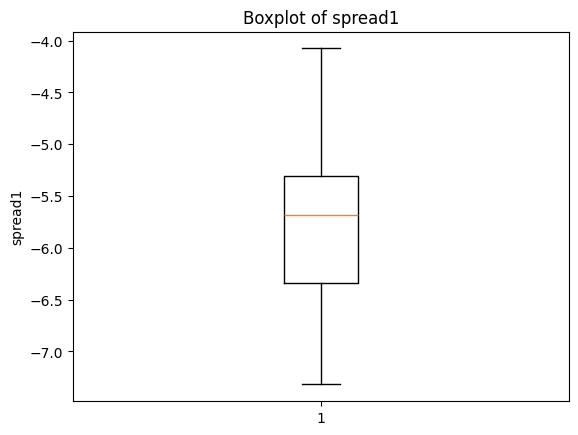

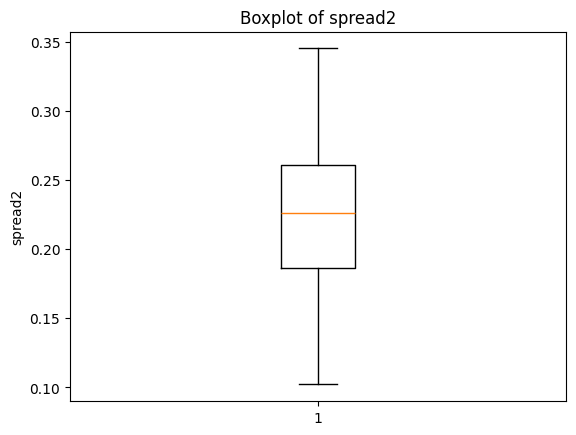

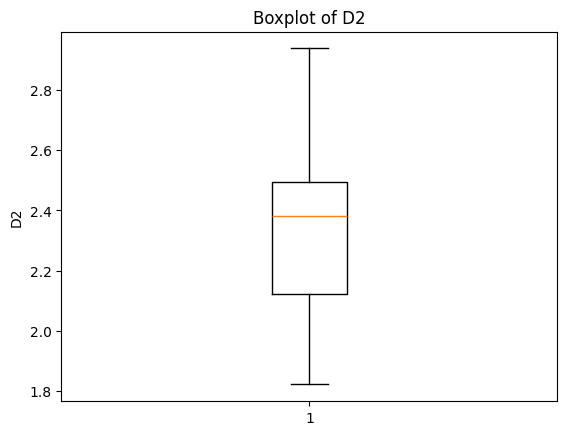

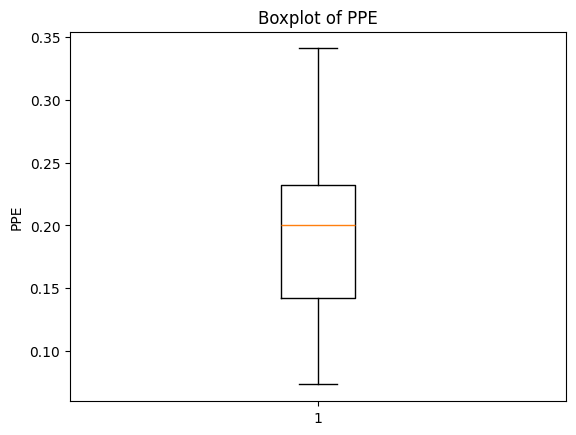

In [7]:
# Applying the replace_outliers function here and then doing again the boxplots
from collaborator1_notebook import replace_outliers
no_outliers_df = replace_outliers(renamed_df)
for column in no_outliers_df.columns:
    if no_outliers_df[column].dtype.kind in 'biufc':  # Checks if the data type is numeric
        fig, ax = plt.subplots()
        ax.boxplot(no_outliers_df[column].dropna())  # Drop NA values for plotting if there are
        plt.ylabel(column)
        plt.title(f"Boxplot of {column}")
        plt.show()

In [8]:
# Finnally, some statistical measures from the renamed_df (previous to outliers treatment) and no_outliers_df are compared to see
# the main differences
print("Shape of the df previous to outliers treatment (renamed_df): {}\nShape of the df post outliers treatment (no_outliers_df): {}"
      .format(renamed_df.shape, no_outliers_df.shape))

Shape of the df previous to outliers treatment (renamed_df): (195, 24)
Shape of the df post outliers treatment (no_outliers_df): (195, 24)


In [9]:
renamed_df.describe() # Some statistical measures from renamed_df (previous to outliers treatment)

,avFF,maxFF,minFF,percJitter,absJitter,rap,ppq,ddp,lShimer,dbShimer,...,apq,dda,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.024081,0.046993,0.024847,21.885974,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.016947,0.030459,0.040418,4.425764,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.007190,0.013640,0.000650,8.441000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.013080,0.024735,0.005925,19.198000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.018260,0.038360,0.011660,22.085000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.029400,0.060795,0.025640,25.075500,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.137780,0.169420,0.314820,33.047000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [10]:
no_outliers_df.describe() # Some statistical measures from no_outliers_df (post outliers treatment)

,avFF,maxFF,minFF,percJitter,absJitter,rap,ppq,ddp,lShimer,dbShimer,...,apq,dda,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,147.301722,178.626344,105.609548,0.005209,0.000038,0.002702,0.002891,0.008108,0.025453,0.238331,...,0.020859,0.040112,0.017252,22.332530,0.506793,0.716535,-5.779803,0.225129,2.335679,0.192757
std,31.382466,45.285185,26.753057,0.002222,0.000020,0.001305,0.001317,0.003913,0.011318,0.109193,...,0.009885,0.018427,0.016176,2.879691,0.081454,0.040677,0.801068,0.055363,0.266062,0.063132
min,95.056000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.007190,0.013640,0.000650,15.338000,0.344252,0.635204,-7.319510,0.102083,1.821297,0.073581
25%,118.355000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.013080,0.024735,0.005925,20.399000,0.447371,0.683945,-6.341274,0.186476,2.123015,0.141944
50%,149.818000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.018260,0.038360,0.011660,21.885974,0.498536,0.718099,-5.684397,0.226510,2.381826,0.200423
75%,170.071000,211.782500,116.324631,0.006355,0.000050,0.003515,0.003446,0.010545,0.031160,0.282626,...,0.025505,0.048630,0.024847,24.905500,0.573547,0.742435,-5.307341,0.261015,2.493708,0.231966
max,214.289000,272.210000,177.584000,0.012840,0.000090,0.007430,0.007500,0.022280,0.056430,0.571000,...,0.048020,0.092110,0.081510,28.409000,0.653427,0.798463,-4.075192,0.345238,2.938114,0.340623


### 2. Basic EDA based on plots and descriptive statistics

In [11]:
# In this section, a correlation analysis is done in order to remove some correlations and detect differences between controls
# and patients.
corr_df = no_outliers_df.drop(columns=["name"], inplace = False)
correlation = corr_df.corr()
correlation.style.background_gradient(cmap='coolwarm')  # Creating the correlation matrix to see dependencies

,avFF,maxFF,minFF,percJitter,absJitter,rap,ppq,ddp,lShimer,dbShimer,apq3,apq5,apq,dda,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
avFF,1.000000,0.737419,0.256023,-0.190875,-0.395498,-0.099859,-0.198427,-0.099790,-0.170894,-0.141570,-0.138272,-0.117312,-0.140329,-0.138323,0.132881,-0.033600,-0.120022,-0.226487,-0.070192,-0.217154,-0.142313,0.341625,-0.228189
maxFF,0.737419,1.000000,0.098012,-0.196933,-0.403609,-0.117990,-0.186812,-0.117999,-0.186688,-0.141593,-0.148929,-0.130399,-0.161335,-0.148944,0.065507,0.014211,-0.311406,-0.180275,-0.296722,-0.291980,-0.163312,0.210949,-0.296632
minFF,0.256023,0.098012,1.000000,-0.334224,-0.236141,-0.323421,-0.290982,-0.323339,-0.175648,-0.205698,-0.080485,-0.146589,-0.175815,-0.080473,-0.077983,0.181742,-0.016139,-0.178321,0.288291,-0.202141,0.067637,-0.022919,-0.176358
percJitter,-0.190875,-0.196933,-0.334224,1.000000,0.799093,0.950154,0.877687,0.950126,0.599524,0.643606,0.557073,0.528217,0.555443,0.557076,0.560874,-0.555202,0.385782,0.257100,0.057384,0.596506,0.250297,0.181386,0.595743
absJitter,-0.395498,-0.403609,-0.236141,0.799093,1.000000,0.741329,0.781558,0.741372,0.538141,0.565659,0.516394,0.466009,0.473073,0.516393,0.518236,-0.417190,0.405223,0.273831,0.180787,0.646193,0.291422,0.075797,0.626460
rap,-0.099859,-0.117990,-0.323421,0.950154,0.741329,1.000000,0.854725,0.999998,0.574882,0.619394,0.539303,0.510964,0.506827,0.539297,0.570671,-0.587726,0.341419,0.230265,0.051245,0.498843,0.145972,0.223128,0.509732
ppq,-0.198427,-0.186812,-0.290982,0.877687,0.781558,0.854725,1.000000,0.854635,0.631960,0.671141,0.608919,0.597426,0.555771,0.608925,0.490847,-0.595223,0.363418,0.280386,0.035493,0.619704,0.264841,0.140394,0.602546
ddp,-0.099790,-0.117999,-0.323339,0.950126,0.741372,0.999998,0.854635,1.000000,0.574783,0.619320,0.539230,0.510881,0.506835,0.539225,0.570509,-0.587664,0.341477,0.230256,0.051254,0.498878,0.145973,0.223130,0.509791
lShimer,-0.170894,-0.186688,-0.175648,0.599524,0.538141,0.574882,0.631960,0.574783,1.000000,0.970153,0.939667,0.951122,0.866717,0.939670,0.495868,-0.703966,0.396710,0.397536,0.045996,0.498918,0.355055,0.197114,0.503717
dbShimer,-0.141570,-0.141593,-0.205698,0.643606,0.565659,0.619394,0.671141,0.619320,0.970153,1.000000,0.910039,0.922147,0.871249,0.910046,0.538333,-0.717721,0.395455,0.383413,0.016540,0.500463,0.350898,0.212659,0.504949


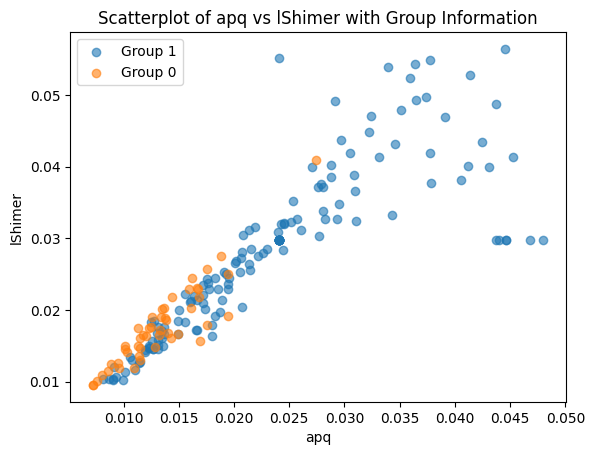

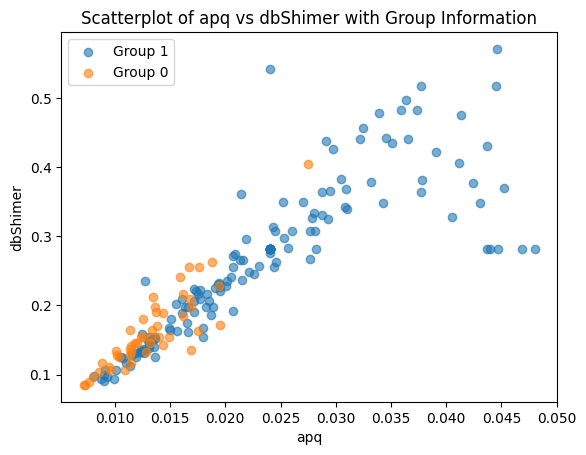

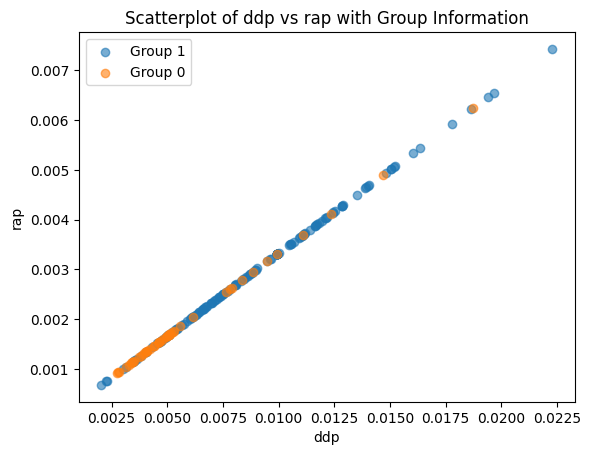

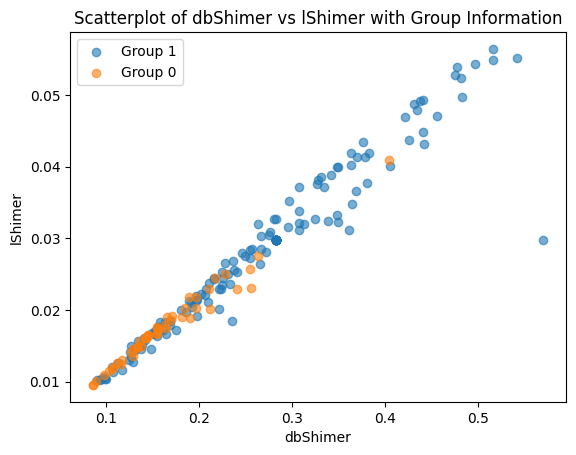

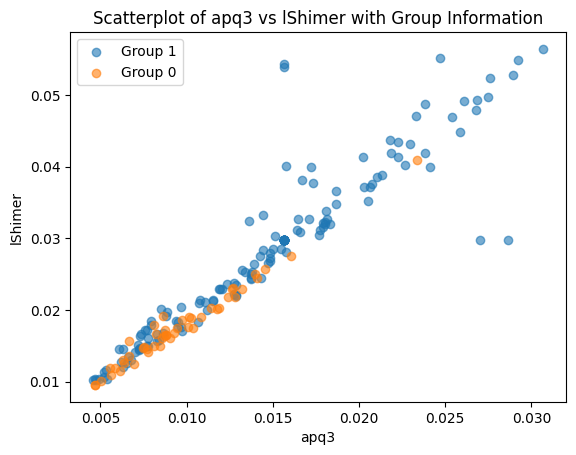

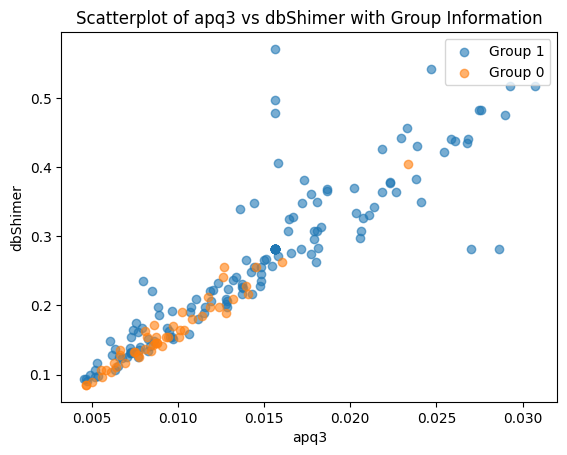

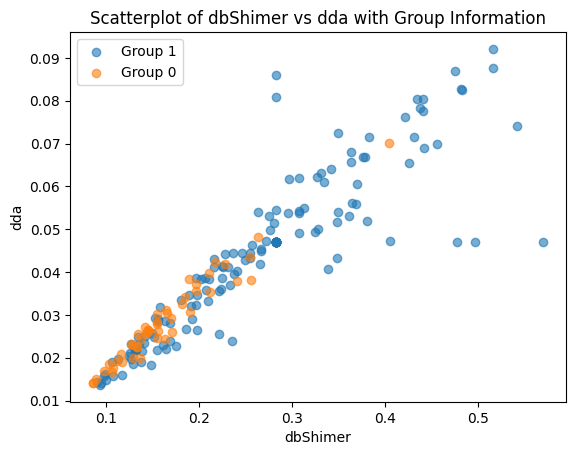

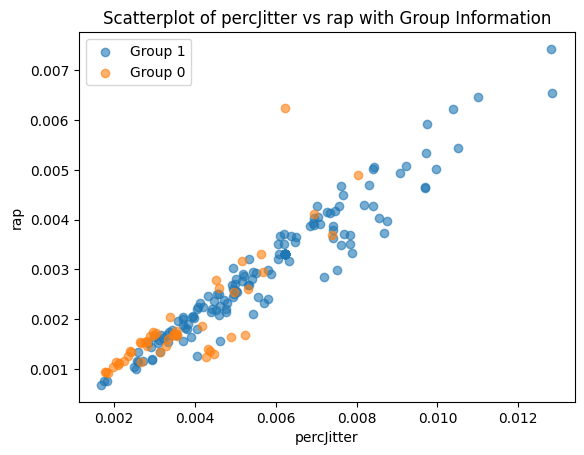

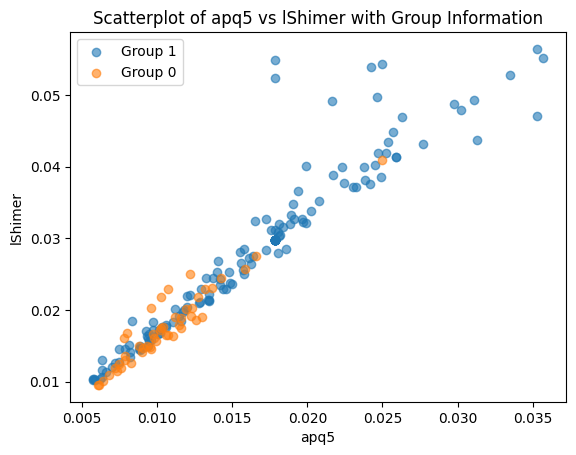

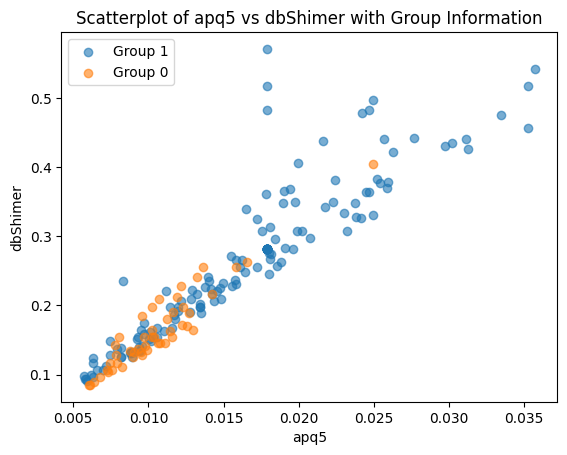

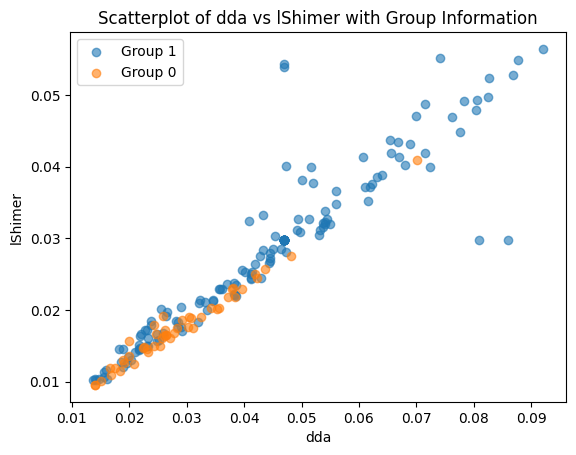

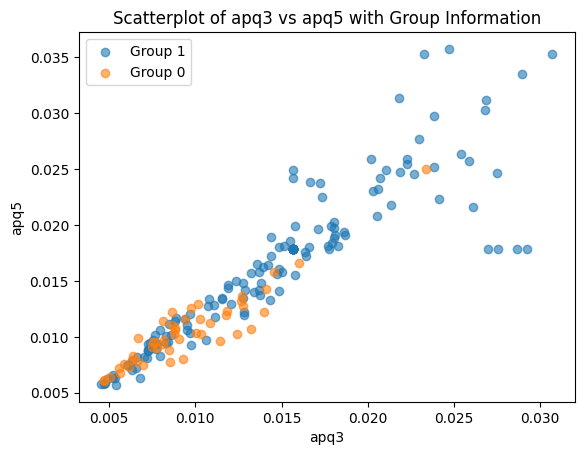

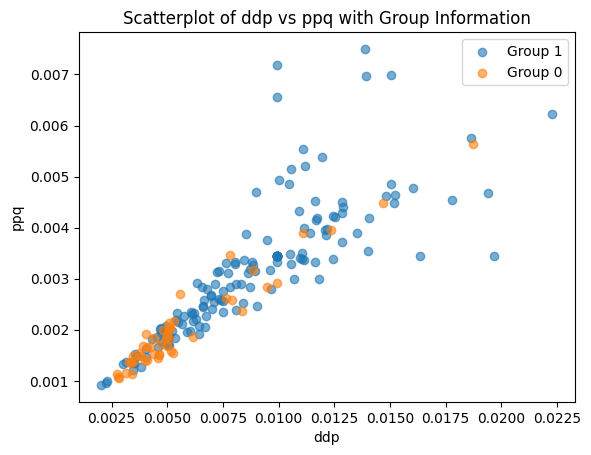

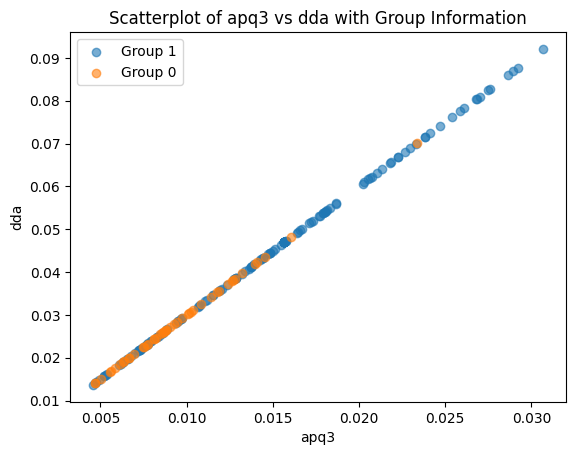

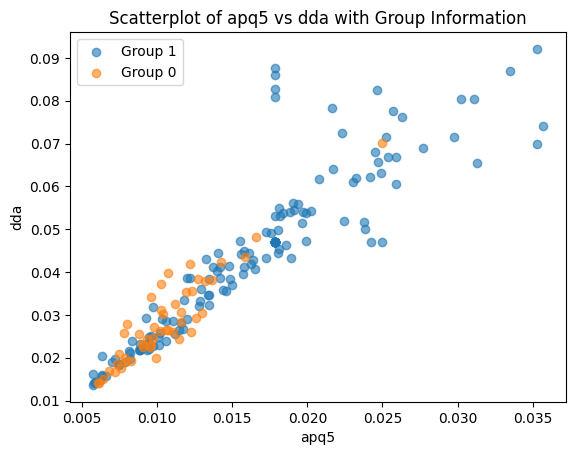

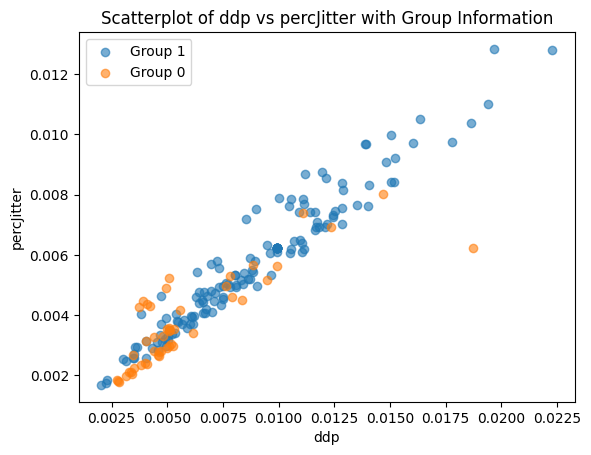

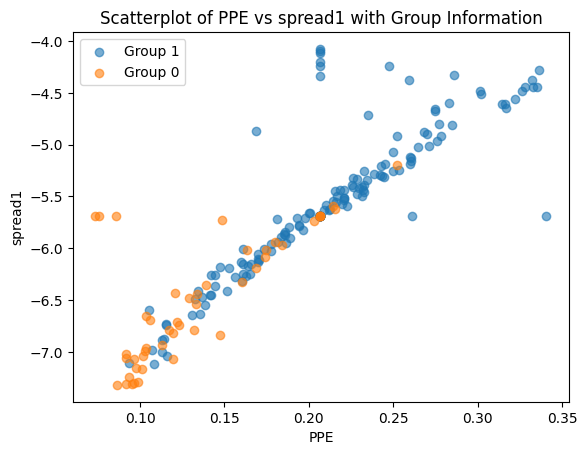

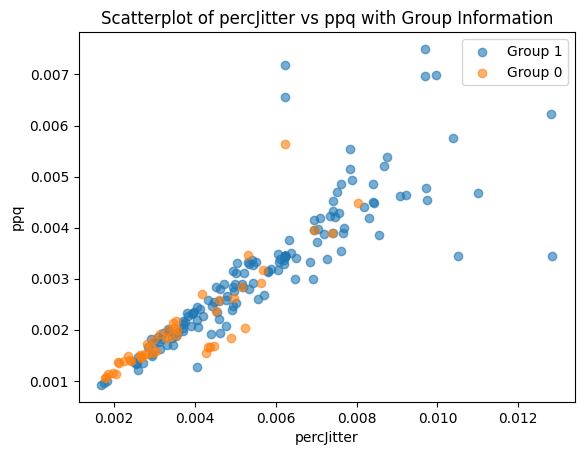

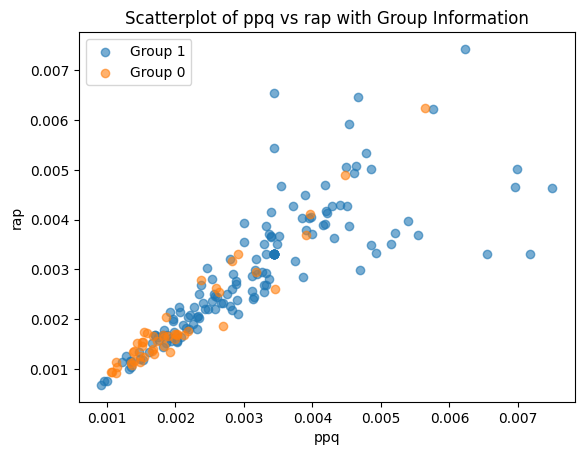

In [12]:
# After seeing this correlation matrix, it is now time to deal with the values that have a correlation of 0.85 or more.
# 0.85 was selected to deal with only those variables that have a really high correlation, but other values can be selected.
# Here, the function scat_plt defined by collaborator2 is going to be used.
from collaborator2_notebook import scat_plt
# Select the pairs of variables that are highly correlated (>= 0.85)
high_corr = [(col, row) for col in correlation.columns for row in correlation.columns 
                  if (abs(correlation[col][row]) > 0.85) and (col != row)] # Looking for the highly correlated variables and avoiding the 
# correlation value for the comparison of the same variable.
high_corr = list(set([tuple(sorted(pair)) for pair in high_corr]))  # Remove the ones that are duplicated (var1, var2) and (var2, var1)

# Now, the high correlated variables are plotted.
for corr in high_corr:
    scat_plt(corr_df[corr[0]], corr_df[corr[1]], corr_df['status'])

In [13]:
# Seeing the results above, the most correlated variables are apq3-dda and ddp-rap. To clean the data, one of each pair of 
# variables will be removed.
cleaned_df = no_outliers_df.drop(columns=["dda", "rap"], inplace = False)
# Showing the new dataframe
cleaned_df.head(5)

,name,avFF,maxFF,minFF,percJitter,absJitter,ppq,ddp,lShimer,dbShimer,...,apq,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.000070,0.005540,0.01109,0.043740,0.426000,...,0.02971,0.02211,21.033,1,0.414783,0.718099,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.000080,0.006960,0.01394,0.029709,0.282251,...,0.04368,0.01929,19.085,1,0.458359,0.718099,-4.075192,0.335590,2.486855,0.206552
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.000090,0.003446,0.01633,0.052330,0.482000,...,0.03590,0.01309,20.651,1,0.429895,0.718099,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.000090,0.006980,0.01505,0.054920,0.517000,...,0.03772,0.01353,20.644,1,0.434969,0.718099,-4.117501,0.334147,2.405554,0.206552
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.000044,0.003446,0.01966,0.029709,0.282251,...,0.04465,0.01767,19.649,1,0.417356,0.718099,-5.684397,0.234513,2.332180,0.206552


### 3. Aggregating and transforming variables in the dataset

In [14]:
# For this point, it is necessary to create a new dataframe that aggregates each variable from the cleaned_df across trials
# for each subject.

# First, the variable "name" needs to be transformed into two variables: subject_ID (Sxx) and trial.
separation = cleaned_df.name.str.split("_", expand = True) # Using _ as the character that functions as a separator
separation.drop(separation.columns[[0,1]], axis=1, inplace=True) # Deleting the first two columns (phon, Rxx) because the info needed is (Sxx and trial)
separation.columns = ["subject_ID", "trial"] # Naming the columns
new_df = cleaned_df.copy()
new_df = new_df.drop("name", axis=1)
new_df[["subject_ID", "trial"]] = separation
new_df.head(5) # Checking if it worked as wanted.

,avFF,maxFF,minFF,percJitter,absJitter,ppq,ddp,lShimer,dbShimer,apq3,...,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE,subject_ID,trial
0,119.992,157.302,74.997,0.00784,0.000070,0.005540,0.01109,0.043740,0.426000,0.021820,...,21.033,1,0.414783,0.718099,-4.813031,0.266482,2.301442,0.284654,S01,1
1,122.400,148.650,113.819,0.00968,0.000080,0.006960,0.01394,0.029709,0.282251,0.015664,...,19.085,1,0.458359,0.718099,-4.075192,0.335590,2.486855,0.206552,S01,2
2,116.682,131.111,111.555,0.01050,0.000090,0.003446,0.01633,0.052330,0.482000,0.027570,...,20.651,1,0.429895,0.718099,-4.443179,0.311173,2.342259,0.332634,S01,3
3,116.676,137.871,111.366,0.00997,0.000090,0.006980,0.01505,0.054920,0.517000,0.029240,...,20.644,1,0.434969,0.718099,-4.117501,0.334147,2.405554,0.206552,S01,4
4,116.014,141.781,110.655,0.01284,0.000044,0.003446,0.01966,0.029709,0.282251,0.015664,...,19.649,1,0.417356,0.718099,-5.684397,0.234513,2.332180,0.206552,S01,5


In [15]:
# Creating the new dataframe using the group_and_average function from collaborator3_notebook
from collaborator3_notebook import group_and_average

final_df = group_and_average(new_df, "subject_ID")

final_df

,subject_ID,avFF,maxFF,minFF,percJitter,absJitter,ppq,ddp,lShimer,dbShimer,...,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE,trial
0,S01,118.719333,141.312833,106.029833,0.010085,0.000076,0.005645,0.014992,0.042903,0.407584,...,0.016318,20.406667,1,0.428488,0.718099,-4.562694,0.296836,2.342642,0.240582,1
1,S02,121.140380,121.894333,95.413167,0.004585,0.000050,0.002857,0.006978,0.021668,0.194333,...,0.008917,22.997333,1,0.598429,0.778017,-5.420414,0.258031,2.287428,0.234019,1
2,S04,147.346167,191.508486,87.532333,0.004347,0.000030,0.002320,0.005285,0.019343,0.181667,...,0.013080,23.899667,1,0.521660,0.664624,-5.796169,0.214652,2.256365,0.194634,1
3,S05,159.837667,181.630167,86.767167,0.006247,0.000040,0.003422,0.009188,0.043337,0.388167,...,0.025608,19.058667,1,0.571994,0.695886,-4.850166,0.256589,2.666672,0.255705,1
4,S06,150.644667,208.264333,78.278333,0.005230,0.000037,0.002838,0.008173,0.021367,0.209667,...,0.014892,24.762000,1,0.432724,0.719675,-6.223537,0.228296,2.440360,0.164939,1
5,S07,200.266833,210.884333,116.324631,0.002163,0.000010,0.001282,0.003523,0.010803,0.095667,...,0.001495,22.700812,0,0.421989,0.741482,-5.914986,0.173049,2.346246,0.168016,1
6,S08,182.032500,196.059833,170.768167,0.003227,0.000018,0.001882,0.005297,0.016737,0.151000,...,0.003183,25.748333,1,0.442739,0.768637,-6.384376,0.220200,2.400193,0.147991,1
7,S10,154.228641,254.280500,116.324631,0.002390,0.000009,0.001487,0.003850,0.015308,0.137000,...,0.005422,24.614667,0,0.483946,0.666631,-7.105562,0.173647,2.298464,0.098390,1
8,S13,125.546333,134.313167,116.898833,0.004595,0.000035,0.001738,0.004335,0.020510,0.186167,...,0.005365,24.736500,0,0.509845,0.762657,-6.695058,0.261352,2.100401,0.123182,1
9,S16,113.014000,154.201333,105.652667,0.008043,0.000072,0.005035,0.010527,0.029677,0.288667,...,0.009658,21.716167,1,0.542488,0.718099,-4.519291,0.239992,1.934123,0.302558,1


### 4. Differentiating between controls (healthy subjects) and patients

status
1    147
0     48
Name: count, dtype: int64


<Axes: ylabel='count'>

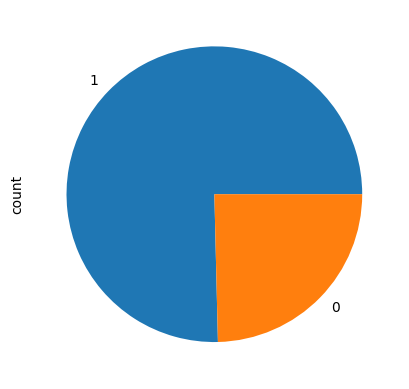

In [16]:
# To start with this differentiating analysis, it is helpful to understand the percentage of controls and patients in data.
# For that purpose, the number of inputs for control and patients is shown, and a pie plot is created.
print(cleaned_df['status'].value_counts())
cleaned_df['status'].value_counts().plot(kind='pie')

In [17]:
# Now it is time to classify the DataFrame data into patients or controls using k-nearest neighbors with k=3.
# The outcomes will be compared across three scenarios.
from sklearn.neighbors import KNeighborsClassifier
from sklearn.base import ClassifierMixin
# Initializing the model
knn = KNeighborsClassifier(n_neighbors=3)
# First scenario: Utilizing cleaned and aggregated data
x = final_df.drop(["subject_ID", "status"], axis=1)
y = final_df["status"]
knn.fit(x,y) # Fitting the model
accuracy = knn.score(x,y) # Calculating the accuracy
print(f"Accuracy for Scenario 1: {accuracy}") # Printing the results

Accuracy for Scenario 1: 0.75


In [19]:
# Second scenario: Cleaned, aggregated, and z-score normalized data
from sklearn.preprocessing import StandardScaler

norm_df = final_df.copy()

# Identifying numeric columns
numeric_columns = norm_df.select_dtypes(include=['number']).columns
# Dropping non-numeric columns
non_numeric_columns = norm_df.columns.difference(numeric_columns)
norm_df = norm_df.drop(non_numeric_columns, axis=1)

# Initializing the StandardScaler
scaler = StandardScaler()

# Normalizing numeric columns
norm_df[numeric_columns] = scaler.fit_transform(norm_df[numeric_columns])

# Separating target and features
X = norm_df
y = final_df['status']

# Fitting the model
knn.fit(X, y)

# Calculating and print the accuracy
accuracy = knn.score(X, y)
print(f"Accuracy for Scenario 2: {accuracy}")

Accuracy for Scenario 2: 0.875


In [20]:
# Third scenario: Same as Scenario 2 but normalized using the min-max option
third_df = final_df.copy()

# Identifying numeric columns
numeric_columns = third_df.select_dtypes(include=['number']).columns
# Dropping non-numeric columns
non_numeric_columns = third_df.columns.difference(numeric_columns)
third_df = third_df.drop(non_numeric_columns, axis=1)

third_df[numeric_columns] = (third_df[numeric_columns] - third_df[numeric_columns].min()) / (third_df[numeric_columns].max() - third_df[numeric_columns].min())

y = final_df['status']
x = third_df

# Fitting the model
knn.fit(x, y)

# Calculating and print the accuracy
accuracy = knn.score(x, y)
print(f"Accuracy for Scenario 3: {accuracy}")

Accuracy for Scenario 3: 0.9375
